<a href="https://colab.research.google.com/github/HueyKolowich/student_success/blob/master/StudentSuccess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTS

In [3]:
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

import pandas as pd

DATA

In [19]:
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)

X = predict_students_dropout_and_academic_success.data.features
y = predict_students_dropout_and_academic_success.data.targets

# Missing:
  # Type of School
  # Tuition Cost
features_to_keep = [
    'Marital Status',
    'Age at enrollment',
    'Previous qualification',
    'Previous qualification (grade)',
    'Nacionality', # Maybe need to drop this feature
    'Mother\'s qualification',
    'Father\'s qualification',
    'Mother\'s occupation',
    'Father\'s occupation',
    'Displaced',
    'Educational special needs',
    'Debtor',
    'Tuition fees up to date',
    'Gender',
    'Scholarship holder'
]

print(X['Father\'s occupation'].value_counts())


Father's occupation
9      1010
7       666
5       516
4       386
3       384
8       318
10      266
6       242
2       197
1       134
0       128
90       65
99       19
193      15
144       8
171       8
192       6
163       5
103       4
175       4
135       3
183       3
152       3
123       3
181       3
194       2
182       2
112       2
151       2
172       2
122       2
102       2
153       1
101       1
114       1
174       1
141       1
132       1
134       1
143       1
131       1
161       1
195       1
121       1
124       1
154       1
Name: count, dtype: int64


Some initial thoughts on how to bin the qualifications...

Feature 6 is the frequency of higher education... we might need to drop this option (it is currently not included in any of the bins)

We will likely use the following categories:
- No education
      (35, 36)
- Primary education
      (30, 38)
- Primary education dropout
      (11, 26, 37)
- Secondary education
      (1, 13, 20, 27)
- Secondary education dropout
      (9, 10, 12, 14, 19, 29, 25)
- Bachelors education
      (2, 3)
- Higher education
      (4, 5, 40, 43, 44)
- Other education
      (18, 22, 31, 33, 39, 41, 42)
- Unknown
      (34)

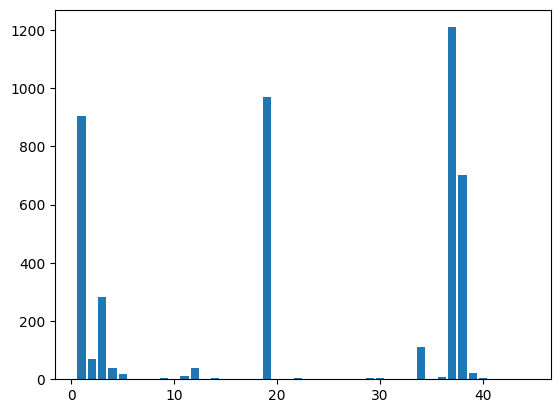

(1, 904)
(2, 68)
(3, 282)
(4, 39)
(5, 18)
(12, 38)
(19, 968)
(34, 112)
(37, 1209)
(38, 702)
(39, 20)


In [20]:
dist = {}

for level in X['Father\'s qualification']:
  if level not in dist.keys():
    dist[level] = 1
  else:
    dist[level] += 1

items = sorted(dist.items())

a, b = zip(*items)
plt.bar(a, b)
plt.show()

for item in sorted(dist.items()):
  if item[1] > 10:
    print(item)

Occupational bins:

- Students
      (0)
- Legislative, Executive, and Senior Management
      (1, 112, 114)
- Specialists and Professionals in Intellectual and Scientific Fields
      (2, 121, 122, 123, 124)
- Intermediate Level Technicians and Technologists
      (3, 131, 132, 134, 135)
- Administrative and Office Support Roles
      (4, 141, 143, 144)
- Personal Services, Security, Sales, and Care Roles
      (5, 151, 152, 153, 154, 195)
- Agriculture, Forestry, and Fishery Workers
      (6, 161, 163, 192)
- Skilled Industry, Construction, and Craftsmen
      (7, 171, 172, 174, 175)
- Machinery, Vehicle Operation, and Assembly Workers
      (8, 181, 182, 183)
- Unskilled Labor
      (9, 193, 194)
- Armed Forces Professions
      (10, 101, 102, 103)
- Other and Undefined
      (90, 99)

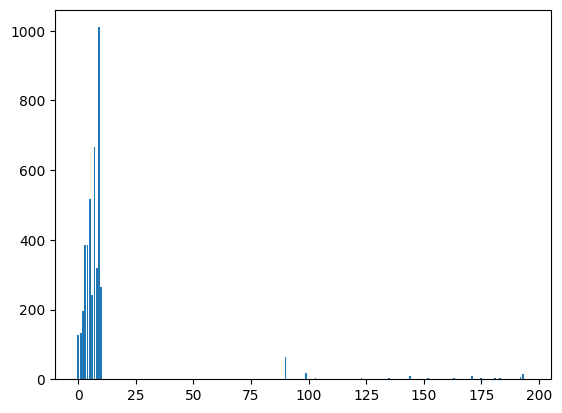

(0, 128)
(1, 134)
(2, 197)
(3, 384)
(4, 386)
(5, 516)
(6, 242)
(7, 666)
(8, 318)
(9, 1010)
(10, 266)
(90, 65)
(99, 19)
(193, 15)


In [21]:
dist = {}

for level in X['Father\'s occupation']:
  if level not in dist.keys():
    dist[level] = 1
  else:
    dist[level] += 1

items = sorted(dist.items())

a, b = zip(*items)
plt.bar(a, b)
plt.show()

for item in sorted(dist.items()):
  if item[1] > 10:
    print(item)

In [22]:
qualification_bins = {
    35: 'No education', 36: 'No education',
    30: 'Primary education', 38: 'Primary education',
    11: 'Primary education dropout', 26: 'Primary education dropout', 37: 'Primary education dropout',
    1: 'Secondary education', 13: 'Secondary education', 20: 'Secondary education', 27: 'Secondary education',
    9: 'Secondary education dropout', 10: 'Secondary education dropout', 12: 'Secondary education dropout',
    14: 'Secondary education dropout', 19: 'Secondary education dropout', 29: 'Secondary education dropout',
    25: 'Secondary education dropout',
    2: 'Bachelors education', 3: 'Bachelors education',
    4: 'Higher education', 5: 'Higher education', 40: 'Higher education', 43: 'Higher education', 44: 'Higher education',
    18: 'Other education', 22: 'Other education', 31: 'Other education', 33: 'Other education', 39: 'Other education',
    41: 'Other education', 42: 'Other education',
    34: 'Unknown'
}

occupational_bins = {
    0: 'Students',
    1: 'Legislative, Executive, and Senior Management', 112: 'Legislative, Executive, and Senior Management', 114: 'Legislative, Executive, and Senior Management',
    2: 'Specialists and Professionals in Intellectual and Scientific Fields', 121: 'Specialists and Professionals in Intellectual and Scientific Fields',
    122: 'Specialists and Professionals in Intellectual and Scientific Fields', 123: 'Specialists and Professionals in Intellectual and Scientific Fields',
    124: 'Specialists and Professionals in Intellectual and Scientific Fields',
    3: 'Intermediate Level Technicians and Technologists', 131: 'Intermediate Level Technicians and Technologists',
    132: 'Intermediate Level Technicians and Technologists', 134: 'Intermediate Level Technicians and Technologists',
    135: 'Intermediate Level Technicians and Technologists',
    4: 'Administrative and Office Support Roles', 141: 'Administrative and Office Support Roles',
    143: 'Administrative and Office Support Roles', 144: 'Administrative and Office Support Roles',
    5: 'Personal Services, Security, Sales, and Care Roles', 151: 'Personal Services, Security, Sales, and Care Roles',
    152: 'Personal Services, Security, Sales, and Care Roles', 153: 'Personal Services, Security, Sales, and Care Roles',
    154: 'Personal Services, Security, Sales, and Care Roles', 195: 'Personal Services, Security, Sales, and Care Roles',
    6: 'Agriculture, Forestry, and Fishery Workers', 161: 'Agriculture, Forestry, and Fishery Workers',
    163: 'Agriculture, Forestry, and Fishery Workers', 192: 'Agriculture, Forestry, and Fishery Workers',
    7: 'Skilled Industry, Construction, and Craftsmen', 171: 'Skilled Industry, Construction, and Craftsmen',
    172: 'Skilled Industry, Construction, and Craftsmen', 174: 'Skilled Industry, Construction, and Craftsmen',
    175: 'Skilled Industry, Construction, and Craftsmen',
    8: 'Machinery, Vehicle Operation, and Assembly Workers', 181: 'Machinery, Vehicle Operation, and Assembly Workers',
    182: 'Machinery, Vehicle Operation, and Assembly Workers', 183: 'Machinery, Vehicle Operation, and Assembly Workers',
    9: 'Unskilled Labor', 193: 'Unskilled Labor', 194: 'Unskilled Labor',
    10: 'Armed Forces Professions', 101: 'Armed Forces Professions', 102: 'Armed Forces Professions', 103: 'Armed Forces Professions',
    90: 'Other and Undefined', 99: 'Other and Undefined'
}

X.loc[:, "Father's qualification"] = X["Father's qualification"].map(qualification_bins)
X.loc[:, "Mother's qualification"] = X["Mother's qualification"].map(qualification_bins)

X.loc[:, "Father's occupation"] = X["Father's occupation"].map(occupational_bins)
X.loc[:, "Mother's occupation"] = X["Mother's occupation"].map(occupational_bins)

X = pd.get_dummies(X, columns=["Father's qualification", "Mother's qualification"])
X = pd.get_dummies(X, columns=["Father's occupation", "Mother's occupation"])

# OPTIONALLY WE CAN ENCODED INTO A REAL FEATURE (1, 2, ...ETC)
# THIS WOULD REDUCE THE AMOUNT OF FEARTURES WE HAVE BY ABOUT 38
# However this would associated the different bins by their sorting in our list

# le = LabelEncoder()
# data['qualification_encoded'] = le.fit_transform(data['Father\'s qualification'])
# data['occupation_encoded'] = le.fit_transform(data['Father\'s occupation'])

<ipython-input-22-bbde720450fa>:42: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Secondary education dropout' 'Bachelors education'
 'Primary education dropout' ... 'Primary education dropout'
 'Primary education dropout' 'Primary education dropout']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[:, "Father's qualification"] = X["Father's qualification"].map(qualification_bins)
<ipython-input-22-bbde720450fa>:43: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Secondary education dropout' 'Secondary education'
 'Primary education dropout' ... 'Primary education dropout'
 'Primary education dropout' 'Primary education']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[:, "Mother's qualification"] = X["Mother's qualification"].map(qualification_bins